In [ ]:
%tensorflow_version 2.x

In [ ]:
import tensorflow as tf
tf.__version__ 

'2.7.0'

In [ ]:
import os
import numpy as np
import random
os.environ['TF_DETERMINISTIC_OPS'] ='1'
os.environ['TF_CUDNN_DETERMINISTIC']='1'
tf.config.threading.set_inter_op_parallelism_threads(1)
tf.config.threading.set_intra_op_parallelism_threads(1)
SEED=1
os.environ['PYTHONHASHSEED']=str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

# 1. 資料準備

In [ ]:
from tensorflow.keras.datasets import cifar10

In [ ]:
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


In [ ]:
y_train_label=y_train_label.reshape(-1)
y_test_label=y_test_label.reshape(-1)

In [ ]:
x_train_normalize = x_train_image.astype('float32') / 255.0
x_test_normalize = x_test_image.astype('float32') / 255.0

In [ ]:
from tensorflow.keras import utils
y_train_onehot = utils.to_categorical(y_train_label)
y_test_onehot = utils.to_categorical(y_test_label)

In [ ]:
print("train data:",'images:',x_train_normalize.shape," labels:",y_train_onehot.shape) 
print("test  data:",'images:',x_test_normalize.shape ," labels:",y_test_onehot.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 10)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 10)


In [ ]:
class_names=[
  "airplane","automobile","bird","cat","deer",
  "dog","frog","horse","ship","truck"]

# 建立模型

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten

In [ ]:
def create_model():
  model = Sequential()
  model.add(Conv2D(input_shape=(32, 32,3),
      filters=32,kernel_size=(3,3),
      activation='relu',padding='same'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(
      filters=64, kernel_size=(3, 3),
      activation='relu', padding='same'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dense(10, activation='softmax'))
  return model

In [ ]:
model = create_model()

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 4096)              0         
                                                                 
 dense (Dense)               (None, 128)               5

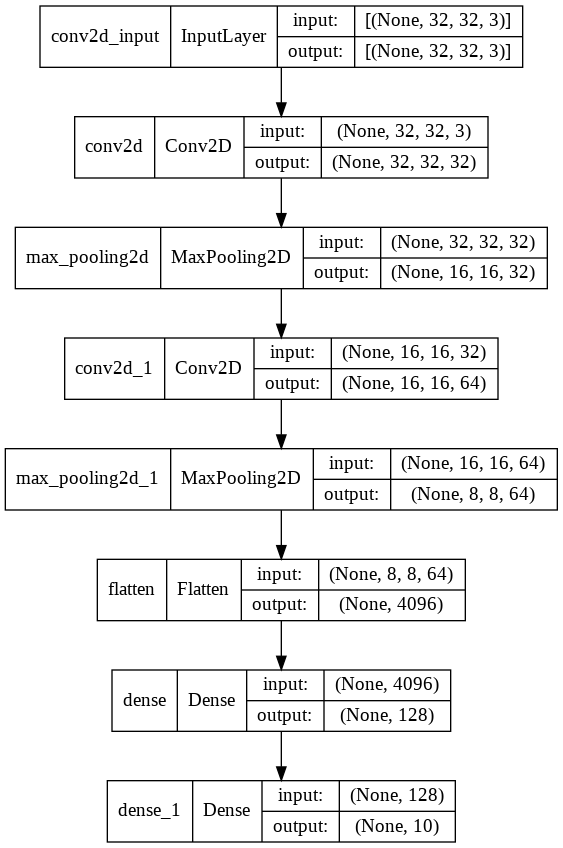

In [ ]:
tf.keras.utils.plot_model(model, 'cifarcnn.png', show_shapes=True)

# 訓練模型

In [ ]:
model.compile(
    loss='categorical_crossentropy',optimizer='adam', metrics=['acc'])

In [ ]:
train_history=model.fit(
    x=x_train_normalize,y=y_train_onehot,
    validation_split=0.2,batch_size=200,epochs=30,verbose=2)       

Epoch 1/30
200/200 - 10s - loss: 1.6007 - acc: 0.4301 - val_loss: 1.3371 - val_acc: 0.5318 - 10s/epoch - 51ms/step
Epoch 2/30
200/200 - 1s - loss: 1.2412 - acc: 0.5641 - val_loss: 1.1722 - val_acc: 0.5949 - 1s/epoch - 7ms/step
Epoch 3/30
200/200 - 1s - loss: 1.1015 - acc: 0.6155 - val_loss: 1.1258 - val_acc: 0.6068 - 1s/epoch - 7ms/step
Epoch 4/30
200/200 - 1s - loss: 1.0132 - acc: 0.6481 - val_loss: 1.0792 - val_acc: 0.6196 - 1s/epoch - 7ms/step
Epoch 5/30
200/200 - 1s - loss: 0.9356 - acc: 0.6761 - val_loss: 0.9855 - val_acc: 0.6606 - 1s/epoch - 7ms/step
Epoch 6/30
200/200 - 1s - loss: 0.8806 - acc: 0.6970 - val_loss: 0.9949 - val_acc: 0.6576 - 1s/epoch - 7ms/step
Epoch 7/30
200/200 - 1s - loss: 0.8218 - acc: 0.7167 - val_loss: 0.9255 - val_acc: 0.6819 - 1s/epoch - 7ms/step
Epoch 8/30
200/200 - 1s - loss: 0.7726 - acc: 0.7355 - val_loss: 0.8903 - val_acc: 0.6963 - 1s/epoch - 7ms/step
Epoch 9/30
200/200 - 1s - loss: 0.7248 - acc: 0.7507 - val_loss: 0.9433 - val_acc: 0.6749 - 1s/epoch 

In [ ]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train_key,valid_key):
    plt.plot(train_history.history[train_key],'--')
    plt.plot(train_history.history[valid_key])
    plt.title('Train History')
    plt.ylabel(train_key)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

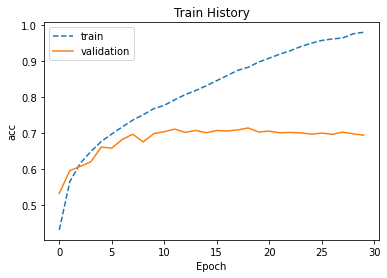

In [ ]:
show_train_history(train_history,'acc','val_acc')

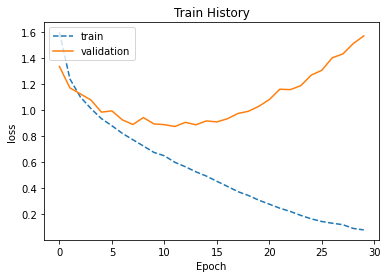

In [ ]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [ ]:
scores = model.evaluate(x_test_normalize, y_test_onehot,verbose=2)

313/313 - 1s - loss: 1.6176 - acc: 0.6854 - 952ms/epoch - 3ms/step


In [ ]:
print('test_loss=',scores[0],'test_acc=',scores[1])

test_loss= 1.6176185607910156 test_acc= 0.6854000091552734


# 進行預測

In [ ]:
probability = model.predict(x_test_normalize)

In [ ]:
prediction=tf.argmax(probability, axis=-1).numpy() 

In [ ]:
prediction

array([3, 8, 0, ..., 5, 1, 7])

# 查看預測結果

In [ ]:
import matplotlib.pyplot as plt 

In [ ]:
label_dict={
    0:"airplane",1:"automobile",2:"bird",3:"cat",4:"deer",
    5:"dog",6:"frog",7:"horse",8:"ship",9:"truck"}

In [ ]:
def plot_images_labels_prediction(
    images,labels,prediction,idx,num=10):
    fig = plt.gcf().set_size_inches(12, 12)    
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title= str(idx)+',' +label_dict[labels[idx]]
        if len(prediction)>0:
            title+="=>"+label_dict[prediction[idx]]
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

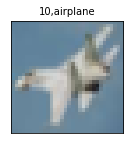

In [ ]:
plot_images_labels_prediction(x_test_image,y_test_label,[],idx=10,num=1)

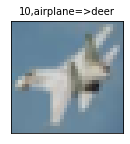

In [ ]:
plot_images_labels_prediction(x_test_image,y_test_label,prediction,idx=10,num=1)

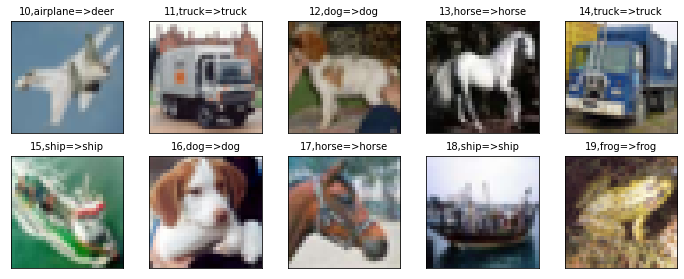

In [ ]:
plot_images_labels_prediction(x_test_image,y_test_label,prediction,idx=10,num=10)

# 查看預測機率

In [ ]:
def show_predicted_probability(
  images,labels,prediction,probability,idx):
  plt.figure(figsize=(1,1));
  plt.xticks([]);plt.yticks([])
  plt.imshow(images[idx],cmap='binary') 
  plt.show()
  if len(labels)>0:print('label:',label_dict[labels[idx]])
  if len(prediction)>0:print('predict:',label_dict[prediction[idx]])
  for i in range(10):
    print('%-10s Probability:%.9f'%(label_dict[i],probability[idx][i]))     

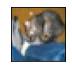

label: cat
predict: cat
airplane   Probability:0.000002820
automobile Probability:0.000000003
bird       Probability:0.000871435
cat        Probability:0.998998106
deer       Probability:0.000031091
dog        Probability:0.000088881
frog       Probability:0.000000041
horse      Probability:0.000000353
ship       Probability:0.000007152
truck      Probability:0.000000152


In [ ]:
show_predicted_probability(
  x_test_image,y_test_label,prediction,probability,0) 

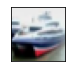

label: ship
predict: ship
airplane   Probability:0.000000061
automobile Probability:0.000001885
bird       Probability:0.000000000
cat        Probability:0.000000000
deer       Probability:0.000000000
dog        Probability:0.000000000
frog       Probability:0.000000000
horse      Probability:0.000000000
ship       Probability:0.999998093
truck      Probability:0.000000000


In [ ]:
show_predicted_probability(
    x_test_image,y_test_label,prediction,probability,1) 

# confusion matrix

In [ ]:
import pandas as pd

In [ ]:
cm=pd.crosstab(
    index=y_test_label,columns=prediction,
    rownames=['label'],colnames=['predict'])

In [ ]:
cm

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,714,21,82,24,24,11,12,24,59,29
1,19,797,16,18,6,6,8,11,33,86
2,50,4,632,85,77,48,32,50,13,9
3,18,6,105,555,63,148,39,44,9,13
4,17,6,114,86,603,47,26,89,10,2
5,12,4,73,198,41,573,19,71,6,3
6,7,4,97,104,43,21,694,15,7,8
7,12,2,42,50,47,60,4,768,2,13
8,62,40,37,22,5,4,9,11,773,37


#heapmap cm

In [ ]:
import numpy as np

In [ ]:
cm_mat=cm.to_numpy()

In [ ]:
cm_mat

array([[714,  21,  82,  24,  24,  11,  12,  24,  59,  29],
       [ 19, 797,  16,  18,   6,   6,   8,  11,  33,  86],
       [ 50,   4, 632,  85,  77,  48,  32,  50,  13,   9],
       [ 18,   6, 105, 555,  63, 148,  39,  44,   9,  13],
       [ 17,   6, 114,  86, 603,  47,  26,  89,  10,   2],
       [ 12,   4,  73, 198,  41, 573,  19,  71,   6,   3],
       [  7,   4,  97, 104,  43,  21, 694,  15,   7,   8],
       [ 12,   2,  42,  50,  47,  60,   4, 768,   2,  13],
       [ 62,  40,  37,  22,   5,   4,   9,  11, 773,  37],
       [ 40,  80,  20,  22,  10,  12,   7,  29,  35, 745]])

In [ ]:
cm_mat.sum(axis=0)

array([ 951,  964, 1218, 1164,  919,  930,  850, 1112,  947,  945])

In [ ]:
cm_mat.sum(axis=1)[:, np.newaxis]

array([[1000],
       [1000],
       [1000],
       [1000],
       [1000],
       [1000],
       [1000],
       [1000],
       [1000],
       [1000]])

In [ ]:
cm_norm = np.around(
    cm_mat.astype('float') / 
    cm_mat.sum(axis=1)[:, np.newaxis], 
    decimals=3)

In [ ]:
cm_norm 

array([[0.714, 0.021, 0.082, 0.024, 0.024, 0.011, 0.012, 0.024, 0.059,
        0.029],
       [0.019, 0.797, 0.016, 0.018, 0.006, 0.006, 0.008, 0.011, 0.033,
        0.086],
       [0.05 , 0.004, 0.632, 0.085, 0.077, 0.048, 0.032, 0.05 , 0.013,
        0.009],
       [0.018, 0.006, 0.105, 0.555, 0.063, 0.148, 0.039, 0.044, 0.009,
        0.013],
       [0.017, 0.006, 0.114, 0.086, 0.603, 0.047, 0.026, 0.089, 0.01 ,
        0.002],
       [0.012, 0.004, 0.073, 0.198, 0.041, 0.573, 0.019, 0.071, 0.006,
        0.003],
       [0.007, 0.004, 0.097, 0.104, 0.043, 0.021, 0.694, 0.015, 0.007,
        0.008],
       [0.012, 0.002, 0.042, 0.05 , 0.047, 0.06 , 0.004, 0.768, 0.002,
        0.013],
       [0.062, 0.04 , 0.037, 0.022, 0.005, 0.004, 0.009, 0.011, 0.773,
        0.037],
       [0.04 , 0.08 , 0.02 , 0.022, 0.01 , 0.012, 0.007, 0.029, 0.035,
        0.745]])

In [ ]:
class_names=[
  "airplane","automobile","bird","cat","deer",
  "dog","frog","horse","ship","truck"]
cm_df = pd.DataFrame(cm_norm,index = class_names,columns = class_names)

In [ ]:
cm_df

,airplane,automobile,bird,cat,deer,dog,frog,horse,ship,truck
airplane,0.714,0.021,0.082,0.024,0.024,0.011,0.012,0.024,0.059,0.029
automobile,0.019,0.797,0.016,0.018,0.006,0.006,0.008,0.011,0.033,0.086
bird,0.050,0.004,0.632,0.085,0.077,0.048,0.032,0.050,0.013,0.009
cat,0.018,0.006,0.105,0.555,0.063,0.148,0.039,0.044,0.009,0.013
deer,0.017,0.006,0.114,0.086,0.603,0.047,0.026,0.089,0.010,0.002
dog,0.012,0.004,0.073,0.198,0.041,0.573,0.019,0.071,0.006,0.003
frog,0.007,0.004,0.097,0.104,0.043,0.021,0.694,0.015,0.007,0.008
horse,0.012,0.002,0.042,0.050,0.047,0.060,0.004,0.768,0.002,0.013
ship,0.062,0.040,0.037,0.022,0.005,0.004,0.009,0.011,0.773,0.037
truck,0.040,0.080,0.020,0.022,0.010,0.012,0.007,0.029,0.035,0.745


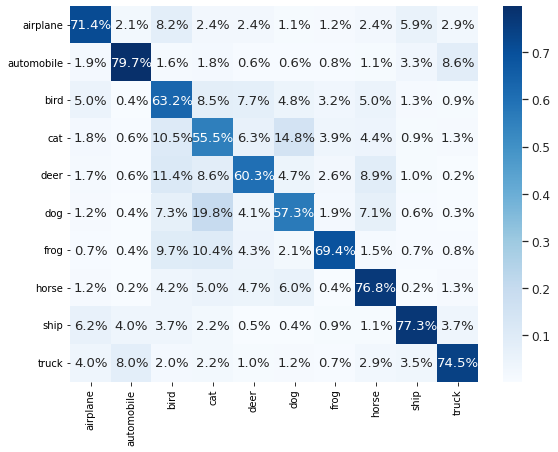

In [ ]:
import seaborn as sns
figure = plt.figure(figsize=(8, 6))
plt.ylabel('Label')
plt.xlabel('Predicted')
plt.tight_layout()
sns.set(font_scale=1.1)
sns.heatmap(cm_df, annot=True,cmap=plt.cm.Blues,fmt='.1%')
plt.show()

#heatmap_confusion_matrix

In [ ]:
class_names=[
  "airplane","automobile","bird","cat","deer",
  "dog","frog","horse","ship","truck"]
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
def plot_heatmap_confusion_matrix(cm_np):
  cm_norm = np.around(
      cm_np.astype('float') / 
      cm_np.sum(axis=1)[:, np.newaxis],decimals=3)
  cm_df = pd.DataFrame(cm_norm,index = class_names,columns = class_names)
  figure = plt.figure(figsize=(8, 6))
  plt.tight_layout();sns.set(font_scale=1)
  plt.ylabel('Label');plt.xlabel('Predicted')
  sns.heatmap(cm_df, annot=True,cmap=plt.cm.Blues,fmt='.1%')
  return figure

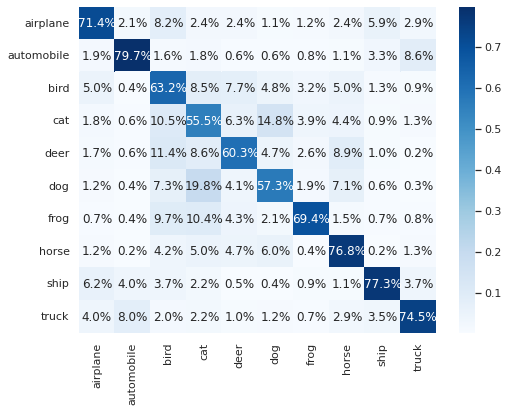

In [ ]:
figure = plot_heatmap_confusion_matrix(cm.to_numpy())

In [ ]:
df = pd.DataFrame({'label':y_test_label,'predict':prediction})

In [ ]:
df[:5]

,label,predict
0,3,3
1,8,8
2,8,0
3,0,0
4,6,4


In [ ]:
df[(df.label==5)&(df.predict==3)]

,label,predict
128,5,3
158,5,3
178,5,3
200,5,3
207,5,3
...,...,...
9804,5,3
9823,5,3
9922,5,3
9985,5,3


# 查看預測錯誤資料

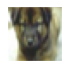

label: dog
predict: dog
airplane   Probability:0.000000000
automobile Probability:0.000000000
bird       Probability:0.010648157
cat        Probability:0.006127884
deer       Probability:0.000022317
dog        Probability:0.983016431
frog       Probability:0.000185128
horse      Probability:0.000000008
ship       Probability:0.000000068
truck      Probability:0.000000006


In [ ]:
show_predicted_probability(
    x_test_image,y_test_label,prediction,probability,33)

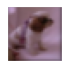

label: dog
predict: cat
airplane   Probability:0.000001021
automobile Probability:0.000309634
bird       Probability:0.001521448
cat        Probability:0.964834154
deer       Probability:0.000652312
dog        Probability:0.032243773
frog       Probability:0.000064504
horse      Probability:0.000235318
ship       Probability:0.000000230
truck      Probability:0.000137615


In [ ]:
show_predicted_probability(
    x_test_image,y_test_label,prediction,probability,178)